In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
new_model = tf.keras.models.load_model('models/cnn_model_open.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 373248)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                23887936  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [3]:
# define filepath for test data
test_path = 'Datasets/Photos/test/'

# label classes
class_name = ['Closed','Open']
#(https://www.kaggle.com/chabdulrahman/eye-state-detection-drowsiness-detection)
# function to import and transform training data into arrays
test_data = []
def create_test_data():
    for classes in class_name:
        path = os.path.join(test_path,classes)   # file path
        index_class = class_name.index(classes)   # turn binary classes into 0 and 1 
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                backtorgb =cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (224,224))
                test_data.append([new_array,index_class])
            except Exception as e:
                pass
    

In [4]:
# call function
create_test_data()

In [5]:
# define X and y
X = []
y = []
for feature, label in test_data:
    X.append(feature)
    y.append(label)
    
# covert data to numpy array
X = np.array(X).reshape(-1,224,224,3)
X.shape

(218, 224, 224, 3)

In [6]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify= y)
len(X_train),len(y_train),len(X_test),len(y_test)

(163, 163, 55, 55)

In [7]:
prediction = new_model.predict_classes(X_test)

/Users/jiachengxu/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.92      0.89      0.91        27

    accuracy                           0.91        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.91      0.91      0.91        55



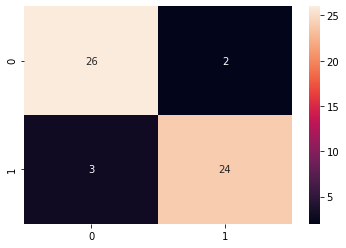

In [10]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction),annot=True);

## Image Sample

In [46]:
test_data = []
path = "Datasets/Photos/test/Open/_120.jpg"
image_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
backtorgb =cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (224,224))
test_data.append(new_array)

test = np.array(test_data).reshape(-1,224,224,3)

new_model.predict_classes(test)

/Users/jiachengxu/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

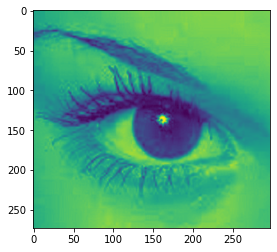

In [43]:
plt.imshow(image_array)

In [48]:
test_data = []
path = "Datasets/Photos/test/Closed/_172.jpg"
image_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
backtorgb =cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (224,224))
test_data.append(new_array)

test = np.array(test_data).reshape(-1,224,224,3)

new_model.predict_classes(test)

/Users/jiachengxu/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

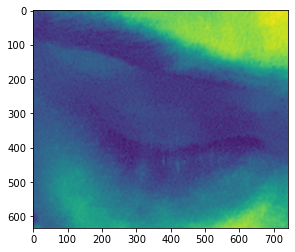

In [49]:
plt.imshow(image_array)